In [29]:
# Import the SOME/IP entities.
from timing.entities import *
# Import the timing analysis functions.
import timing.timing_analysis as analysis
# Import the plot functions.
from plot.client_service_plot import *
from plot.support import *

In [30]:
import logging
# Set the logging level.
analysis.set_logger_level(logging.ERROR)

# Simple example with a single Client/Service pair
In this simple case, the discovery time is the time taken by the client to discover the desired service.

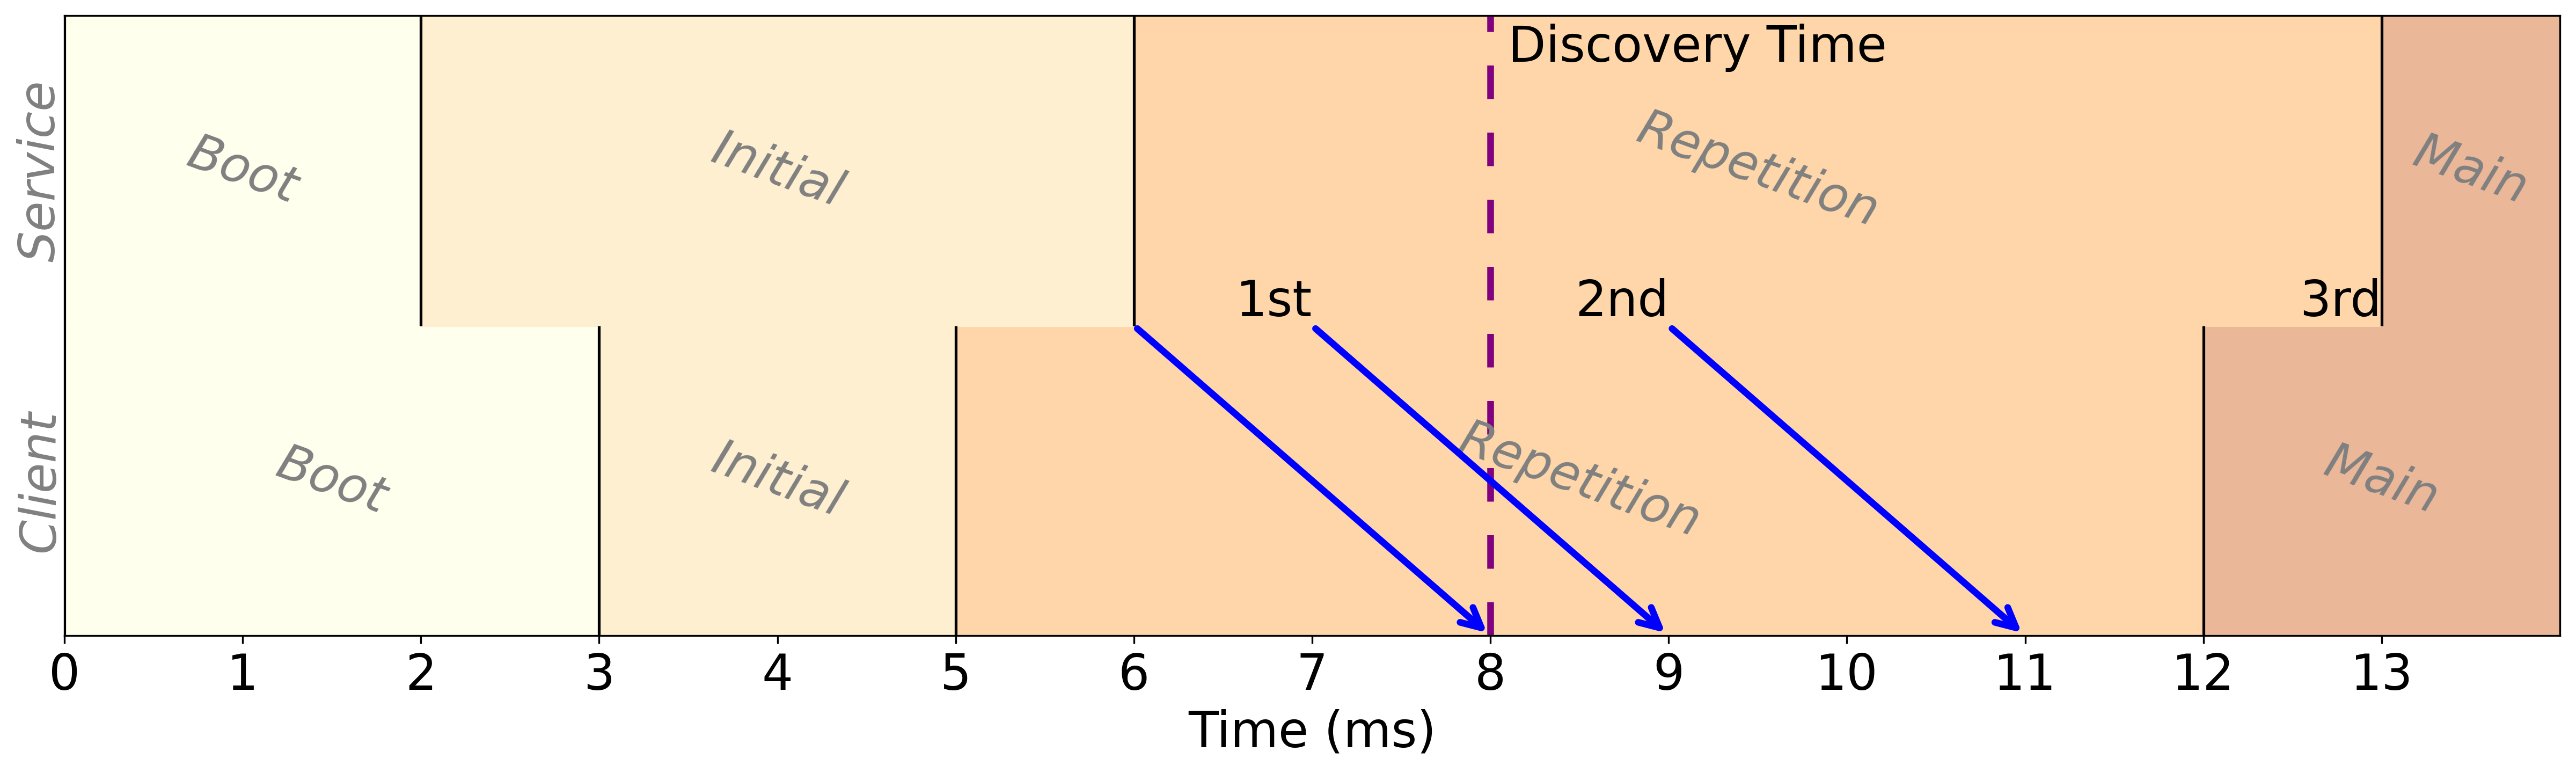

In [31]:
# Service and client configuration.
s = Service("Service", boot_del=2, init_del=4, rep_del=1, rep_max=3, cyc_del=2, ans_del=1, offer_mode=True)
c = Client("Client", boot_del=3, init_del=2, rep_del=1, rep_max=3, find_mode=False)
# List of entities.
entities = [c, s]
# Communication delay.
t_c = 2
# Adjust the phases.
adjust_phases(entities)
# The actual start-up delay.
t_w = analysis.timing_analysis(s, c, t_c)
# Setup the plot.
[fig, ax] = plot_setup(entities, width=20, height=5, fontsize=22)
# Plot the phases.
plot_all_phases(ax, entities=entities, palette=light_palette)
# Plot service messages.
plot_rep_messages(ax, s, c, t_c, plot_first=True, stop_at_first=False, send_time=False, arrival_time=False, plot_answer=False, plot_index=True)
plot_cyc_messages(ax, s, c, t_c, plot_first=True, stop_at_first=False, send_time=False, arrival_time=False, plot_answer=False, plot_index=True)
plot_rep_messages(ax, c, s, t_c, plot_first=True, stop_at_first=False, send_time=False, arrival_time=False, plot_answer=True, plot_index=True)
# Plot the timing analysis result.
plot_t_w(t_w, color='purple', label="Discovery Time", ha="left", fontsize=22)

# Advanced example with a system of Client/Service pairs
What follows is an example of a set of client and services composing a system. The discovery time in this case is the maximum time taken by these pairs to discover each other.

In [32]:
import random

def random_pair(client_name: str, service_name: str) -> Relation:
    offer_mode = random.randint(0, 100) > 50
    find_mode = True if not offer_mode else (random.randint(0, 100) > 50)
    return Relation(
        client=Client(
            client_name,
            boot_del=random.randint(1, 9),
            init_del=random.randint(1, 9),
            rep_del=random.randint(1, 3),
            rep_max=random.randint(3, 6),
            find_mode=find_mode),
        service=Service(
            service_name,
            boot_del=random.randint(1, 9),
            init_del=random.randint(1, 9),
            rep_del=random.randint(1, 3),
            rep_max=random.randint(3, 6),
            cyc_del=random.randint(1, 6),
            ans_del=random.randint(1, 3),
            offer_mode=offer_mode),
        t_c=random.randint(1, 5))

def plot_relation(rel: Relation) -> None:
    # Get the entities.
    entities = [rel.client, rel.service]
    # Compute the start-up delay.
    t_w = analysis.timing_analysis(rel.service, rel.client, rel.t_c)
    # Adjust the phases.
    adjust_phases(entities)
    # Setup the plot.
    [fig, ax] = plot_setup(entities, width=30, height=1, fontsize=8)
    # Plot the phases.
    plot_all_phases(ax, entities=entities, palette=light_palette)
    # Plot service messages.
    plot_rep_messages(ax, rel.service, rel.client, rel.t_c, plot_first=True, stop_at_first=True, plot_index=True)
    plot_cyc_messages(ax, rel.service, rel.client, rel.t_c, plot_first=True, stop_at_first=True, plot_index=True)
    plot_rep_messages(ax, rel.client, rel.service, rel.t_c, plot_first=True, stop_at_first=True, plot_answer=True, plot_index=True)
    # Plot the timing analysis result.
    plot_t_w(t_w, color='purple', label="Discovery Time", ha="left", fontsize=8)


In [38]:
# Service and client configuration.
r0 = random_pair("c0", "s0")
r1 = random_pair("c1", "s1")
r2 = random_pair("c2", "s2")
r3 = random_pair("c3", "s3")
r4 = random_pair("c4", "s4")
# The actual start-up delay.
t_w = analysis.timing_analysis_system([r0, r1, r2, r3, r4])
print("The discovery time is:", t_w)

The discovery time is: 23.0


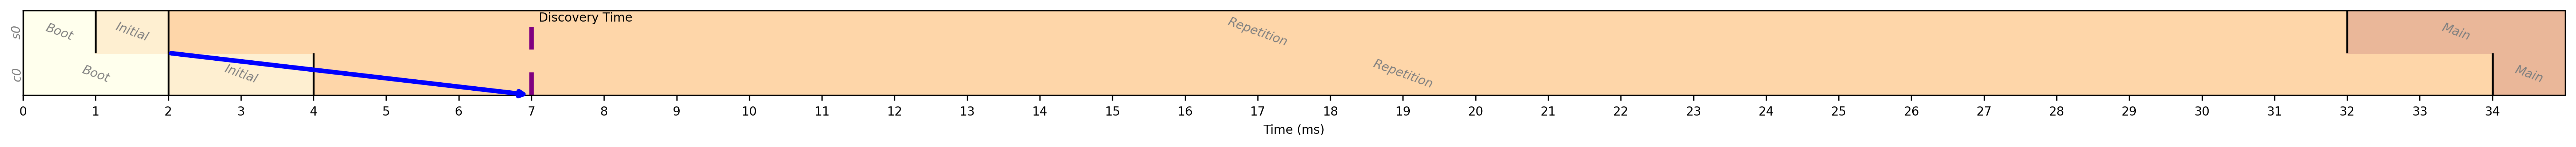

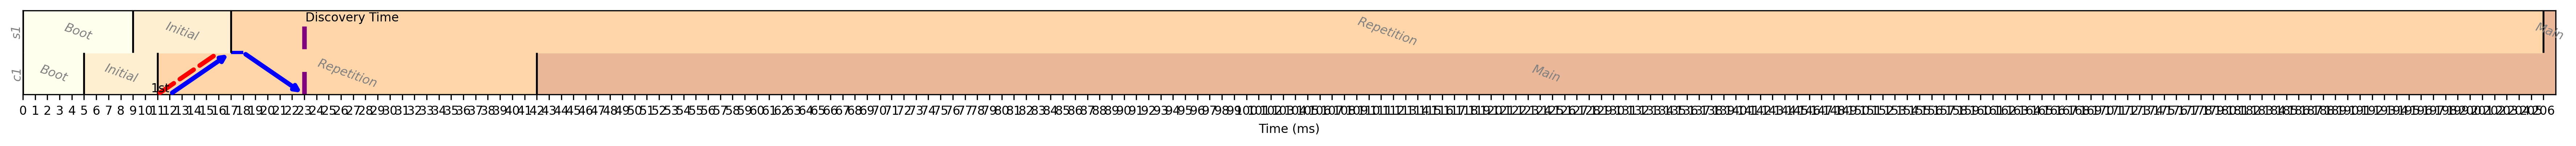

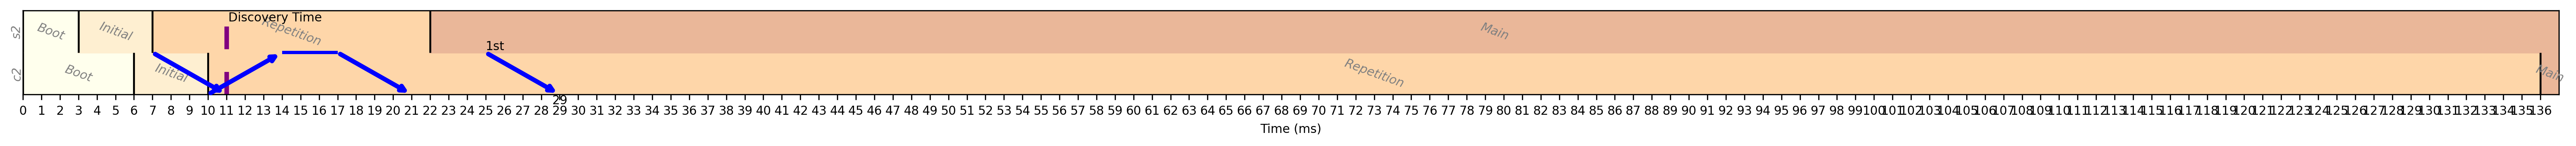

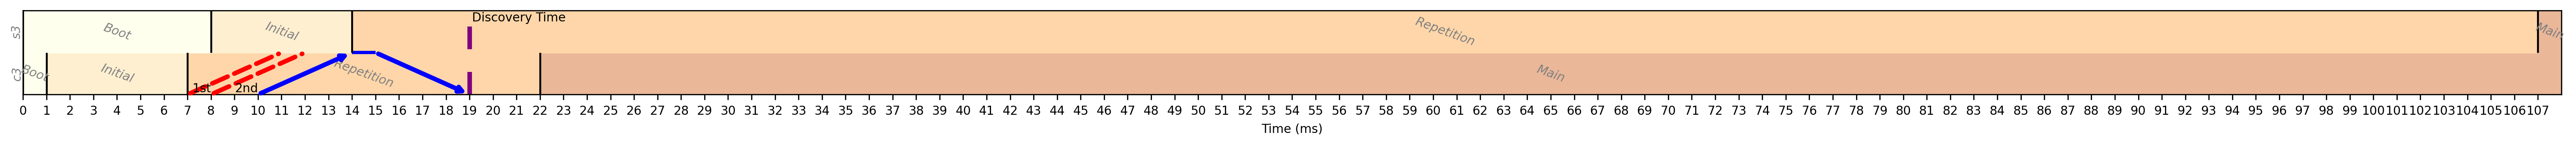

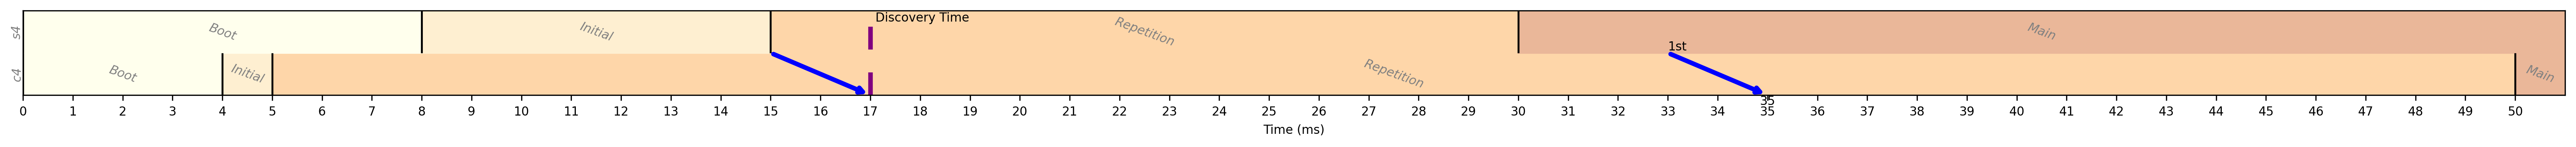

In [39]:
plot_relation(r0)
plot_relation(r1)
plot_relation(r2)
plot_relation(r3)
plot_relation(r4)